# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95

In [7]:
results = {}
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum= MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with LR = 0.100000
Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Use

50000/50000 [==============================] - 3s 54us/step - loss: 1.4393 - acc: 0.4947 - val_loss: 1.5901 - val_acc: 0.4560
Epoch 49/50
50000/50000 [==============================] - 3s 54us/step - loss: 1.4329 - acc: 0.4953 - val_loss: 1.6161 - val_acc: 0.4550
Epoch 50/50
50000/50000 [==============================] - 3s 55us/step - loss: 1.4274 - acc: 0.4981 - val_loss: 1.6744 - val_acc: 0.4197
Experiment with LR = 0.010000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)

Epoch 50/50
50000/50000 [==============================] - 3s 53us/step - loss: 0.3599 - acc: 0.8699 - val_loss: 2.2368 - val_acc: 0.5229
Experiment with LR = 0.001000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
______________________________

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 3s 64us/step - loss: 2.2503 - acc: 0.1639 - val_loss: 2.1921 - val_acc: 0.2149
Epoch 2/50
50000/50000 [==============================] - 3s 57us/step - loss: 2.1480 - acc: 0.2397 - val_loss: 2.1106 - val_acc: 0.2628
Epoch 3/50
50000/50000 [==============================] - 3s 61us/step - loss: 2.0756 - acc: 0.2725 - val_loss: 2.0450 - val_acc: 0.2852
Epoch 4/50
50000/50000 [==============================] - 3s 59us/step - loss: 2.0182 - acc: 0.2960 - val_loss: 1.9938 - val_acc: 0.3058
Epoch 5/50
50000/50000 [==============================] - 3s 57us/step - loss: 1.9739 - acc: 0.3128 - val_loss: 1.9556 - val_acc: 0.3161
Epoch 6/50
50000/50000 [==============================] - 3s 57us/step - loss: 1.9394 - acc: 0.3244 - val_loss: 1.9250 - val_acc: 0.3269
Epoch 7/50
50000/50000 [==============================] - 3s 57us/step - loss: 1.9113 - acc: 0.3338 - val_loss: 1.9006 - val_acc

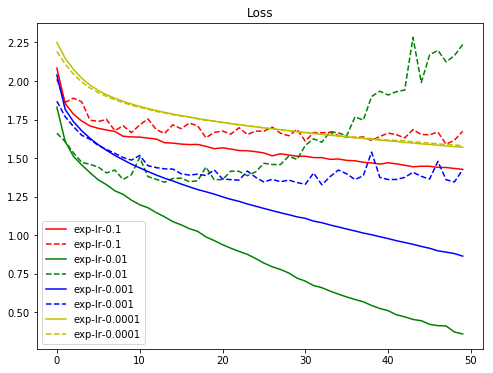

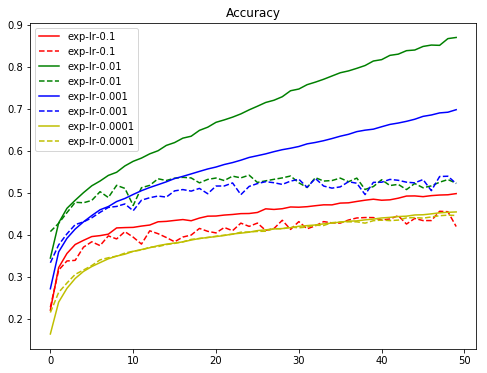

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

In [9]:
results = {}
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    #optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum= MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer='RMSprop')

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [============================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 3s 66us/step - loss: 2.2833 - acc: 0.2108 - val_loss: 1.9756 - val_acc: 0.2893
Epoch 2/50
50000/50000 [==============================] - 3s 60us/step - loss: 1.8898 - acc: 0.3163 - val_loss: 1.9155 - val_acc: 0.3189
Epoch 3/50
50000/50000 [==============================] - 3s 60us/step - loss: 1.7848 - acc: 0.3571 - val_loss: 1.8075 - val_acc: 0.3610
Epoch 4/50
50000/50000 [==============================] - 4s 88us/step - loss: 1.7164 - acc: 0.3846 - val_loss: 1.7889 - val_acc: 0.3479
Epoch 5/50
50000/50000 [==============================] - 3s 58us/step - loss: 1.6633 - acc: 0.4055 - val_loss: 1.7411 - val_acc: 0.3581
Epoch 6/50
50000/50000 [==============================] - 3s 57us/step - loss: 1.6117 - acc: 0.4235 - val_loss: 1.9512 - val_acc: 0.3269
Epoch 7/50
50000/50000 [==============================] - 3s 64us/step - loss: 1.5763 - acc: 0.4387 - val_loss: 1.6545 - val_acc

50000/50000 [==============================] - 4s 74us/step - loss: 2.3940 - acc: 0.2175 - val_loss: 2.0621 - val_acc: 0.2587A: 2s - loss: 2.9437 - acc - ETA: 1s - los
Epoch 2/50
50000/50000 [==============================] - 3s 65us/step - loss: 1.8922 - acc: 0.3164 - val_loss: 1.8988 - val_acc: 0.3186s - loss: 1.8934 - acc: 0.315
Epoch 3/50
50000/50000 [==============================] - 3s 68us/step - loss: 1.7930 - acc: 0.3561 - val_loss: 1.9709 - val_acc: 0.3035
Epoch 4/50
50000/50000 [==============================] - 3s 60us/step - loss: 1.7096 - acc: 0.3898 - val_loss: 1.7685 - val_acc: 0.3732
Epoch 5/50
50000/50000 [==============================] - 3s 60us/step - loss: 1.6571 - acc: 0.4076 - val_loss: 1.6891 - val_acc: 0.3942
Epoch 6/50
50000/50000 [==============================] - 3s 60us/step - loss: 1.6082 - acc: 0.4232 - val_loss: 1.7592 - val_acc: 0.3791
Epoch 7/50
50000/50000 [==============================] - 3s 60us/step - loss: 1.5720 - acc: 0.4382 - val_loss: 1.6504

50000/50000 [==============================] - 3s 57us/step - loss: 1.8889 - acc: 0.3187 - val_loss: 1.8349 - val_acc: 0.3359
Epoch 3/50
50000/50000 [==============================] - 3s 56us/step - loss: 1.7833 - acc: 0.3588 - val_loss: 1.8473 - val_acc: 0.3446
Epoch 4/50
50000/50000 [==============================] - 3s 56us/step - loss: 1.7188 - acc: 0.3837 - val_loss: 1.7487 - val_acc: 0.3663
Epoch 5/50
50000/50000 [==============================] - 3s 56us/step - loss: 1.6596 - acc: 0.4064 - val_loss: 2.0055 - val_acc: 0.3208
Epoch 6/50
50000/50000 [==============================] - 3s 55us/step - loss: 1.6156 - acc: 0.4212 - val_loss: 1.6224 - val_acc: 0.4187
Epoch 7/50
50000/50000 [==============================] - 3s 55us/step - loss: 1.5657 - acc: 0.4417 - val_loss: 1.8008 - val_acc: 0.3661
Epoch 8/50
50000/50000 [==============================] - 3s 56us/step - loss: 1.5255 - acc: 0.4532 - val_loss: 1.6280 - val_acc: 0.4217
Epoch 9/50
50000/50000 [============================

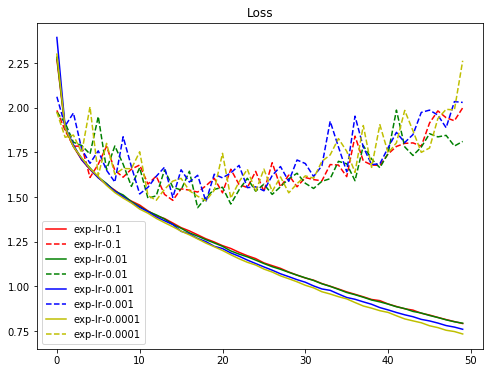

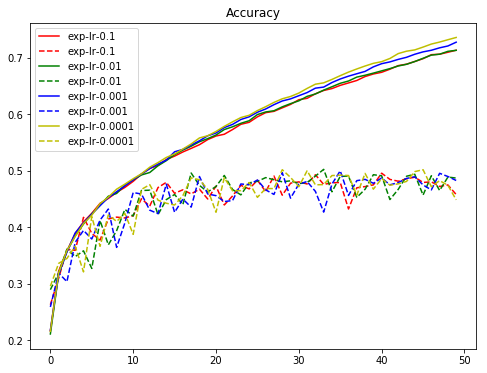

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

In [11]:
results = {}
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    #optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum= MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer='AdaGrad')

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [============================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 3s 63us/step - loss: 14.4423 - acc: 0.0997 - val_loss: 14.5062 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 3s 58us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 3s 61us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 3s 59us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 3s 58us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 3s 57us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 3s 60us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.

50000/50000 [==============================] - 3s 69us/step - loss: 14.4414 - acc: 0.0998 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 3s 62us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 3s 62us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 3s 62us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 3s 58us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 3s 58us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 3s 58us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 8/50
50000/50000 [==============

Epoch 2/50
50000/50000 [==============================] - 3s 57us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 3s 57us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 3s 58us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 3s 58us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 3s 57us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 3s 58us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 8/50
50000/50000 [==============================] - 3s 56us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 9/50
50000/50000 [===

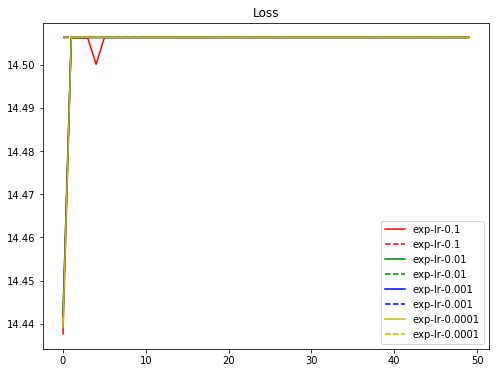

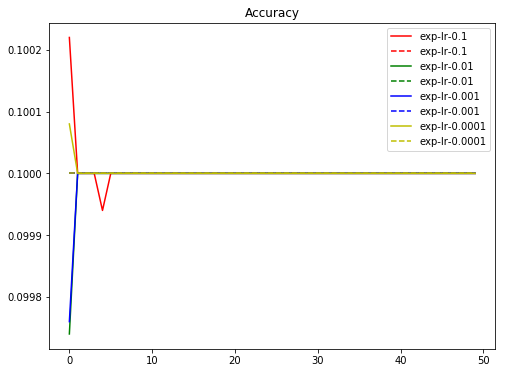

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

In [13]:
results = {}
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    #optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum= MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer='Adam')

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [============================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 4s 72us/step - loss: 1.9365 - acc: 0.3014 - val_loss: 1.7628 - val_acc: 0.3598
Epoch 2/50
50000/50000 [==============================] - 3s 64us/step - loss: 1.7144 - acc: 0.3874 - val_loss: 1.6438 - val_acc: 0.4109
Epoch 3/50
50000/50000 [==============================] - 3s 63us/step - loss: 1.6164 - acc: 0.4227 - val_loss: 1.5894 - val_acc: 0.4351
Epoch 4/50
50000/50000 [==============================] - 3s 64us/step - loss: 1.5486 - acc: 0.4494 - val_loss: 1.6042 - val_acc: 0.4257
Epoch 5/50
50000/50000 [==============================] - 3s 68us/step - loss: 1.4974 - acc: 0.4650 - val_loss: 1.4824 - val_acc: 0.4756
Epoch 6/50
50000/50000 [==============================] - 3s 66us/step - loss: 1.4732 - acc: 0.4756 - val_loss: 1.5063 - val_acc: 0.4654
Epoch 7/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.4278 - acc: 0.4934 - val_loss: 1.4805 - val_acc

50000/50000 [==============================] - 3s 63us/step - loss: 1.7084 - acc: 0.3869 - val_loss: 1.6329 - val_acc: 0.4188
Epoch 3/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.6241 - acc: 0.4206 - val_loss: 1.6130 - val_acc: 0.4279
Epoch 4/50
50000/50000 [==============================] - 3s 63us/step - loss: 1.5558 - acc: 0.4442 - val_loss: 1.5138 - val_acc: 0.4678
Epoch 5/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.5091 - acc: 0.4644 - val_loss: 1.5265 - val_acc: 0.4552
Epoch 6/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.4756 - acc: 0.4729 - val_loss: 1.5047 - val_acc: 0.4661
Epoch 7/50
50000/50000 [==============================] - 3s 63us/step - loss: 1.4306 - acc: 0.4912 - val_loss: 1.5046 - val_acc: 0.4651
Epoch 8/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.4118 - acc: 0.4960 - val_loss: 1.4474 - val_acc: 0.4885
Epoch 9/50
50000/50000 [============================

Epoch 4/50
50000/50000 [==============================] - 3s 66us/step - loss: 1.5462 - acc: 0.4507 - val_loss: 1.5468 - val_acc: 0.4531
Epoch 5/50
50000/50000 [==============================] - 3s 70us/step - loss: 1.5082 - acc: 0.4622 - val_loss: 1.5103 - val_acc: 0.4563
Epoch 6/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.4591 - acc: 0.4828 - val_loss: 1.4826 - val_acc: 0.4744
Epoch 7/50
50000/50000 [==============================] - 3s 63us/step - loss: 1.4191 - acc: 0.4919 - val_loss: 1.4649 - val_acc: 0.4801
Epoch 8/50
50000/50000 [==============================] - 3s 61us/step - loss: 1.3997 - acc: 0.5024 - val_loss: 1.4072 - val_acc: 0.5013
Epoch 9/50
50000/50000 [==============================] - 3s 61us/step - loss: 1.3675 - acc: 0.5126 - val_loss: 1.5052 - val_acc: 0.4632
Epoch 10/50
50000/50000 [==============================] - 3s 60us/step - loss: 1.3475 - acc: 0.5190 - val_loss: 1.4394 - val_acc: 0.4867
Epoch 11/50
50000/50000 [===============

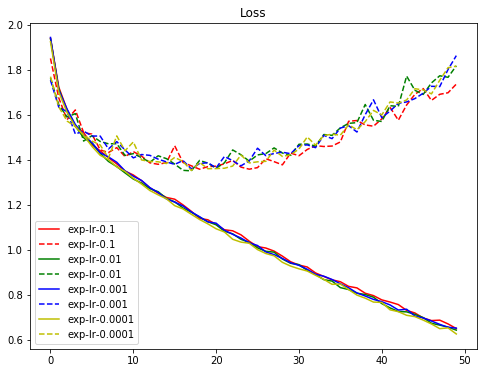

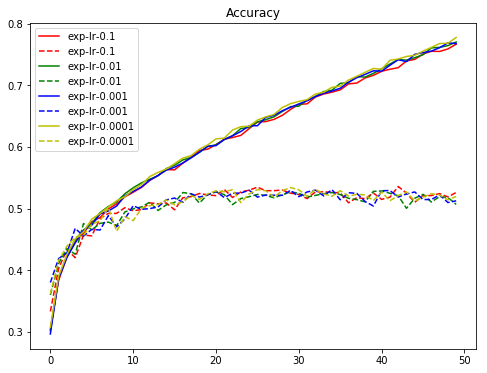

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()